In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [2]:
df = pd.read_csv('./Food_Inspections.csv')

## Summary

In [3]:
df.shape

(215067, 17)

In [4]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"


In [5]:
df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [6]:
df['Facility Type'].nunique()

500

In [7]:
df['Risk'].unique()

array(['Risk 2 (Medium)', 'Risk 1 (High)', 'Risk 3 (Low)', nan, 'All'],
      dtype=object)

In [8]:
df['City'].unique()

array(['CHICAGO', 'Chicago', 'ELMHURST', 'CHICAGO.', 'WILMETTE',
       'MAYWOOD', 'chicago', 'ELK GROVE VILLAGE', 'SCHAUMBURG',
       'CALUMET CITY', 'BLOOMINGDALE', nan, 'CICERO', 'SUMMIT',
       'INACTIVE', 'LAKE ZURICH', 'alsip', 'WORTH', 'ALSIP', 'OAK PARK',
       'CCHICAGO', '312CHICAGO', 'BERWYN', 'CHicago', 'EVANSTON',
       'CHICAGOCHICAGO', 'chicagoBEDFORD PARK', 'CHICAGOHICAGO',
       'BRIDGEVIEW', 'GRIFFITH', 'NILES NILES', 'LANSING', 'NEW YORK',
       'NEW HOLSTEIN', 'ALGONQUIN', 'WADSWORTH', 'WHEATON', 'ROSEMONT',
       'PLAINFIELD', 'PALOS PARK', 'HIGHLAND PARK', 'LAKE BLUFF',
       'SCHILLER PARK', 'SKOKIE', 'BANNOCKBURNDEERFIELD', 'CHCICAGO',
       'OAK LAWN', 'Norridge', 'CHARLES A HAYES', 'CHICAGOI', 'CHCHICAGO',
       'CHICAGO HEIGHTS', 'COUNTRY CLUB HILLS', 'WESTMONT',
       'EAST HAZEL CREST', 'LOMBARD', 'JUSTICE', 'OOLYMPIA FIELDS',
       'TINLEY PARK', 'STREAMWOOD', 'BURNHAM', 'BOLINGBROOK',
       'DES PLAINES', 'BLUE ISLAND', 'OLYMPIA FIELDS', 'GLE

In [9]:
df['Inspection Type'].nunique()

110

In [10]:
df['Violations'].nunique()

156694

In [11]:
df.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,2.150670e+05,2.150500e+05,215015.000000,214357.000000,214357.000000
mean,1.528593e+06,1.630235e+06,60628.756640,41.880900,-87.676414
std,6.613738e+05,9.027383e+05,116.794766,0.081020,0.058523
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428
25%,1.188696e+06,1.247734e+06,60614.000000,41.832625,-87.707331
50%,1.528143e+06,1.992182e+06,60625.000000,41.891869,-87.666419
75%,2.104572e+06,2.278334e+06,60643.000000,41.939788,-87.634955
max,2.472696e+06,9.999999e+06,60827.000000,42.021064,-87.525094


Se añade formato de fecha

In [12]:
df['Date'] = pd.to_datetime(df['Inspection Date'], format='%m/%d/%Y')

In [13]:
df_21 = df[df.Date >= '2021-01-01']

## Risk

<AxesSubplot:xlabel='Risk'>

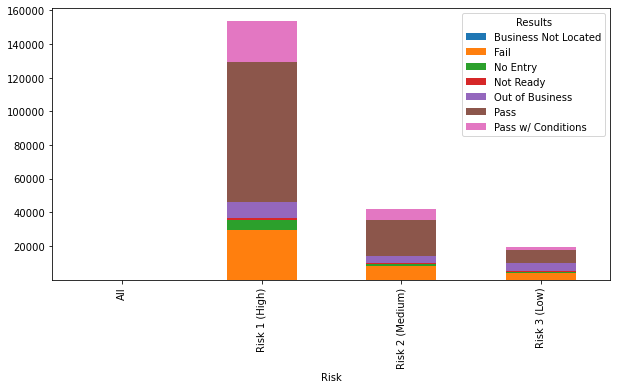

In [14]:
df[['Risk', 'Results', 'Inspection ID']].\
groupby(['Risk', 'Results']).count().unstack()['Inspection ID'].\
plot.bar(stacked=True, figsize=(10,5))

## Violations

<ipython-input-15-e39f00574857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viol['Violation'] = df_viol.Violations.notnull()


<AxesSubplot:xlabel='Violation'>

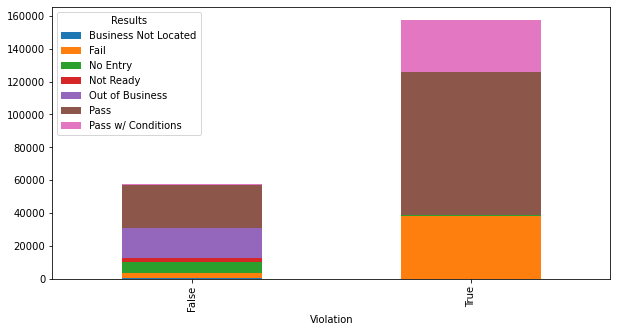

In [15]:
df_viol = df[['Inspection ID','Violations', 'Results']]
df_viol['Violation'] = df_viol.Violations.notnull()
df_viol[['Violation', 'Results', 'Inspection ID']].\
groupby(['Violation', 'Results']).count().unstack()['Inspection ID'].\
plot.bar(stacked=True, figsize=(10,5))

## Mapa

In [16]:
chicago_map = gpd.read_file('./map/chicago_streets.shp')
# El de abajo es para cambiar el mapa por uno que solo muestra el área de Chicago
#chicago_map = gpd.read_file('./map/chicago.shp')

In [14]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_21["Longitude"], df_21["Latitude"])]
geo_df = gpd.GeoDataFrame(df_21,
                         crs=crs,
                         geometry=geometry)

/home/bruno/miniconda3/envs/dpa/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

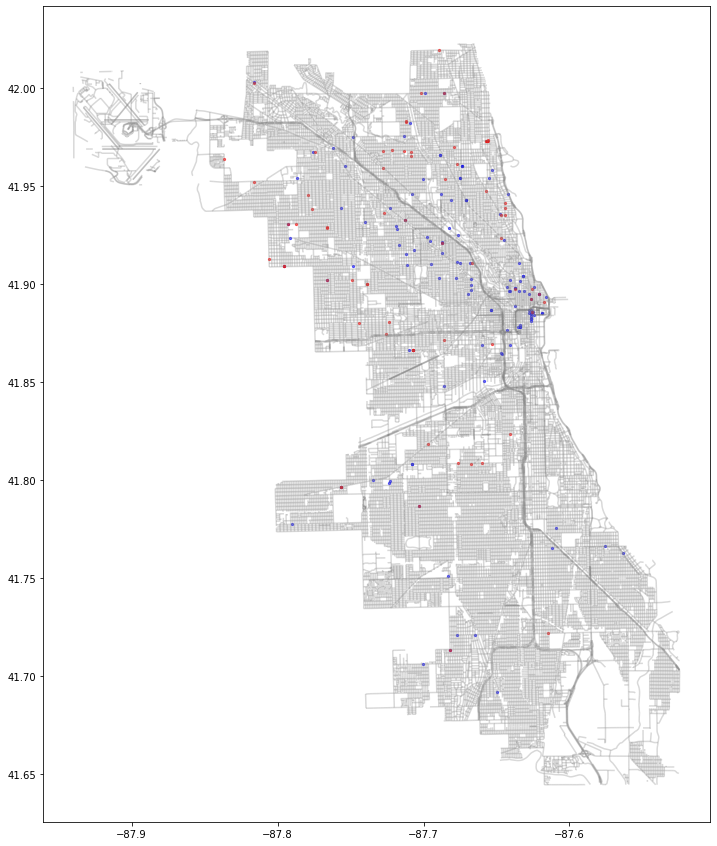

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
chicago_map.plot(ax=ax, alpha = 0.3, color='gray')
geo_df[geo_df['Results']=='Pass'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'blue')
geo_df[geo_df['Results']=='Fail'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'red')
#ctx.add_basemap(ax)

## Plotly

In [15]:
import plotly.express as px

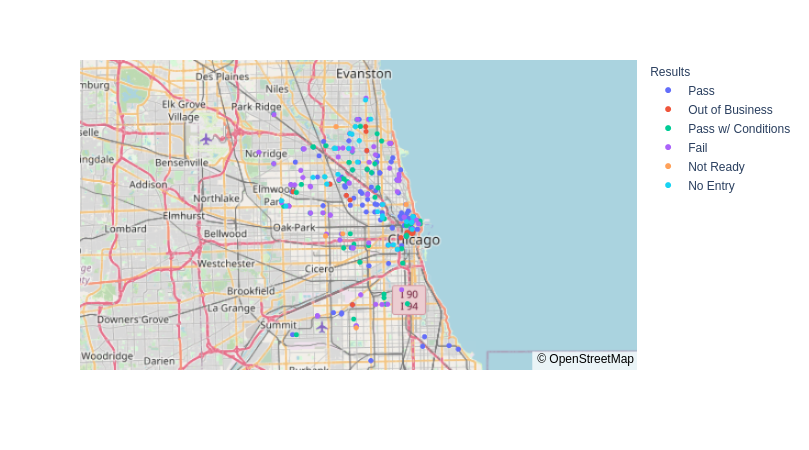

In [69]:
fig = px.scatter_mapbox(df_21, 
                     lat = "Latitude", 
                     lon = "Longitude",
                     color = "Results",
                     hover_name = "AKA Name",
                     zoom = 9, 
                     mapbox_style= "open-street-map",
                     center = {"lat": 41.9, "lon": -87.7})
fig.show()

In [66]:
# fig = px.scatter_geo(geo_df, 
#                      lat = geo_df.geometry.y, 
#                      lon = geo_df.geometry.x,
#                      hover_name="AKA Name",
#                      projection="albers usa",
#                      scope = "usa",
#                      color = "Results",
#                      center = {"lat": 42.1, "lon": -85.7})
# fig.show()